In [18]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [19]:
n_channels = 19
file = "eeg.txt"
sampFreq = 500

500

In [11]:
signals = readdlm(joinpath(pwd(),"..","example",file),'\t',header=true)
sig = convert.(Float64,signals[1][:,1:n_channels]);
header = signals[2][:,1:n_channels]
header = Array{String}([i[1:end-5] for i in header])
header = header[1,:]

19-element Array{String,1}:
 "Fp1"
 "Fp2"
 "Fz" 
 "F3" 
 "F4" 
 "F7" 
 "F8" 
 "Cz" 
 "C3" 
 "C4" 
 "T3" 
 "T4" 
 "Pz" 
 "P3" 
 "P4" 
 "T5" 
 "T6" 
 "O1" 
 "O2" 

In [54]:
cor_mat = cor(sig)

19×19 Array{Float64,2}:
 1.0       0.922783  0.724275  0.753272  …  0.102015   0.142628  0.08126  
 0.922783  1.0       0.733048  0.703782     0.140111   0.168162  0.132185 
 0.724275  0.733048  1.0       0.880997     0.309426   0.435742  0.375829 
 0.753272  0.703782  0.880997  1.0          0.188373   0.348937  0.247097 
 0.747971  0.786728  0.916148  0.795838     0.333401   0.357618  0.318625 
 0.644179  0.591735  0.575132  0.645602  …  0.0498741  0.104462  0.0700476
 0.690388  0.767483  0.641991  0.555355     0.263568   0.156332  0.149651 
 0.412453  0.403987  0.825412  0.711744     0.349032   0.59822   0.513053 
 0.412817  0.379847  0.735721  0.786309     0.272802   0.612083  0.456607 
 0.380978  0.409464  0.721743  0.567369     0.485378   0.499719  0.506179 
 0.246984  0.163678  0.286293  0.370907  …  0.230734   0.256905  0.164029 
 0.180613  0.218113  0.283504  0.200885     0.497699   0.183888  0.275117 
 0.266756  0.272301  0.625137  0.513394     0.474488   0.813288  0.729402 
 


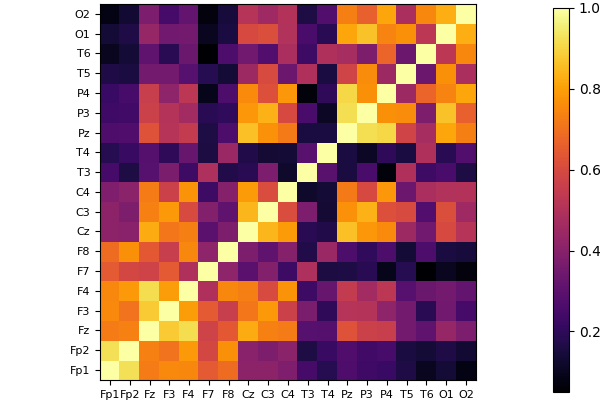

In [108]:
cor_plot = heatmap(header,header,cor(sig),aspect_ratio=1)


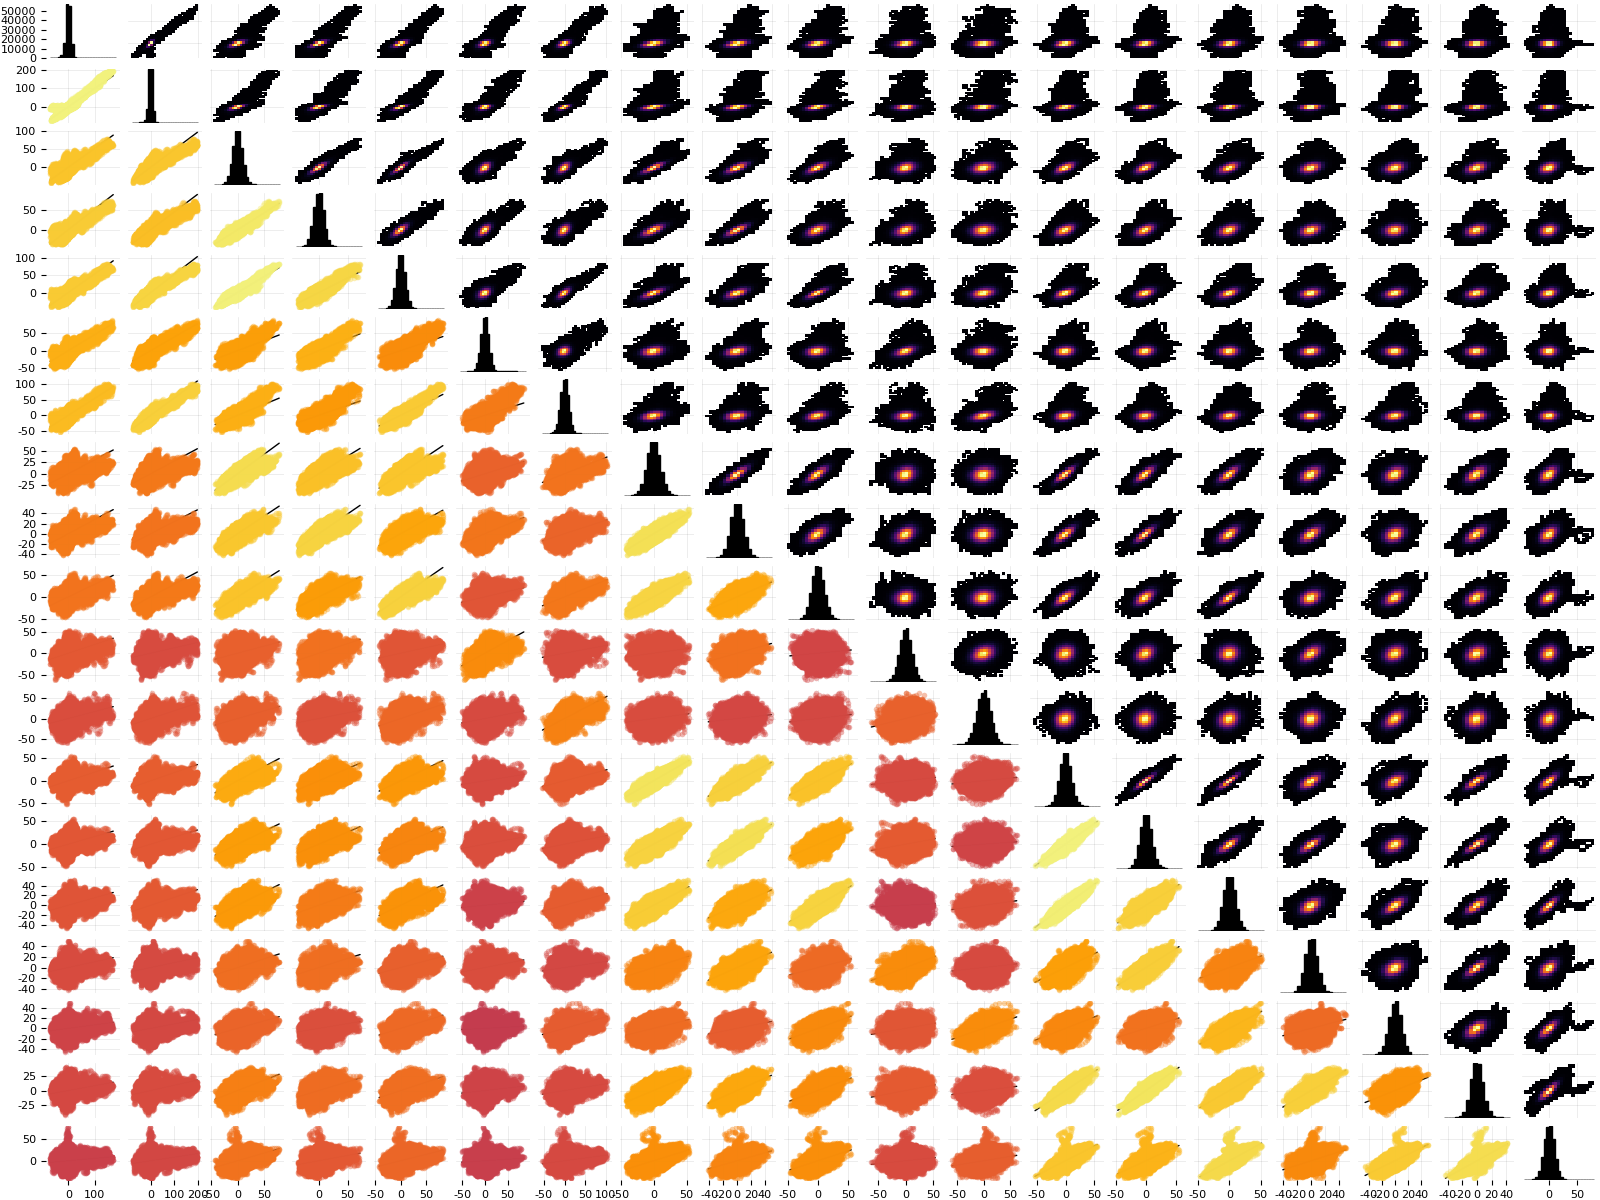

In [6]:
using StatPlots; pyplot()
corrplot(sig,size=(1600,1200))

## Coherence

Covariance from StatsBase.
By an extension of the Wiener–Khinchin theorem, the Fourier transform of the cross-spectral density ${\displaystyle S_{xy}(\omega )} S_{xy}(\omega )$ is the cross-covariance function.

Cross-spectral density is then taken as the inverse fourier transform

Coherence:

$C_{{xy}}(f)={\frac  {|G_{{xy}}(f)|^{2}}{G_{{xx}}(f)G_{{yy}}(f)}}$

In [12]:
# using Conda; Conda.add("scipy")
using PyCall
@pyimport scipy.signal as pysig 

In [13]:
sig1 = sig[:,1];
sig2 = sig[:,2];

In [14]:
freq,coher1 = pysig.coherence(sig1,sig2,fs=sampFreq)

([0.0, 1.95313, 3.90625, 5.85938, 7.8125, 9.76563, 11.7188, 13.6719, 15.625, 17.5781  …  232.422, 234.375, 236.328, 238.281, 240.234, 242.188, 244.141, 246.094, 248.047, 250.0], [0.967642, 0.957986, 0.964324, 0.934456, 0.851236, 0.874639, 0.848119, 0.808569, 0.794852, 0.768417  …  6.97088e-6, 0.000598306, 0.000878397, 0.000131421, 0.000922937, 0.000387107, 0.00141175, 1.38512e-5, 0.00230011, 2.63192e-5])


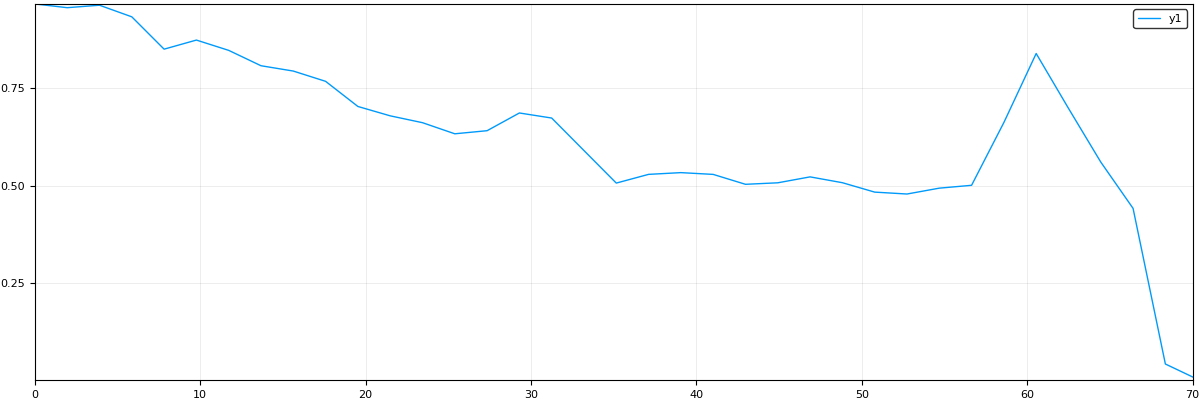

In [15]:
plot(freq,coher1,xlims=(0,70), size=(1200,400))

In [16]:
# TODO: sum or mean?
coh_delta  =  mean(coher1[1 .<= freq .< 4])
coh_theta  =  mean(coher1[4 .<= freq .< 8])
coh_alpha1 =  mean(coher1[8 .<= freq .< 11])
coh_alpha2 =  mean(coher1[11 .<= freq .< 14])
coh_beta1  =  mean(coher1[14 .<= freq .< 20])
coh_beta2  =  mean(coher1[20 .<= freq .< 31])
coh_gamma  =  mean(coher1[31 .<= freq .< 50])

[coh_delta coh_theta coh_alpha1 coh_alpha2 coh_beta1 coh_beta2 coh_gamma]

1×7 Array{Float64,2}:
 0.961155  0.892846  0.874639  0.828344  0.755657  0.660641  0.540217

In [17]:
n_bands = 7
coh = repmat([0],1,n_bands) # number of bands
for i in 1:n_channels, j in 1:n_channels
    freq,coher = pysig.coherence(sig[:,i],sig[:,j],fs=sampFreq)
    coh_delta  =  mean(coher[1 .<= freq .< 4])
    coh_theta  =  mean(coher[4 .<= freq .< 8])
    coh_alpha1 =  mean(coher[8 .<= freq .< 11])
    coh_alpha2 =  mean(coher[11 .<= freq .< 14])
    coh_beta1  =  mean(coher[14 .<= freq .< 20])
    coh_beta2  =  mean(coher[20 .<= freq .< 31])
    coh_gamma  =  mean(coher[31 .<= freq .< 50])
    ch_1 = header[i]
    ch_2 = header[j]
#     println("Coerencia $ch_1~$ch_2 ",[coh_delta coh_theta coh_alpha1 coh_alpha2 coh_beta1 coh_beta2 coh_gamma])
    coh = vcat(coh,[coh_delta coh_theta coh_alpha1 coh_alpha2 coh_beta1 coh_beta2 coh_gamma])
end
coh_bands = coh[2:end,:]

361×7 Array{Float64,2}:
 1.0        1.0        1.0        …  1.0         1.0         1.0       
 0.961155   0.892846   0.874639      0.755657    0.660641    0.540217  
 0.683095   0.64764    0.867624      0.748429    0.688539    0.601635  
 0.74121    0.747314   0.908499      0.74412     0.640149    0.471273  
 0.765481   0.623059   0.76029       0.529389    0.469359    0.344006  
 0.81958    0.427356   0.609093   …  0.52169     0.34553     0.192987  
 0.825047   0.490556   0.414053      0.25343     0.190683    0.0840078 
 0.139287   0.354789   0.706462      0.36902     0.256547    0.34826   
 0.223073   0.367055   0.654852      0.259024    0.196039    0.281635  
 0.226659   0.318696   0.537235      0.186759    0.183372    0.134797  
 0.196224   0.0498186  0.117588   …  0.106252    0.0497931   0.0640964 
 0.261974   0.105443   0.0527844     0.00852989  0.00880299  0.00121709
 0.0605598  0.206416   0.431331      0.10319     0.0199035   0.197652  
 ⋮                                ⋱     

In [20]:
size(coh_bands) # (19x19) , 7

(361, 7)

In [21]:
coh_delta  = reshape(coh_bands[:,1],19,19) 
coh_theta  = reshape(coh_bands[:,2],19,19) 
coh_alpha1 = reshape(coh_bands[:,3],19,19) 
coh_alpha2 = reshape(coh_bands[:,4],19,19) 
coh_beta1  = reshape(coh_bands[:,5],19,19) 
coh_beta2  = reshape(coh_bands[:,6],19,19) 
coh_gamma  = reshape(coh_bands[:,7],19,19) 

19×19 Array{Float64,2}:
 1.0         0.540217    0.601635    …  0.0956674  0.126842    0.114058  
 0.540217    1.0         0.523544       0.111286   0.128286    0.125162  
 0.601635    0.523544    1.0            0.209885   0.213908    0.20778   
 0.471273    0.291607    0.696838       0.0993032  0.138106    0.110916  
 0.344006    0.373879    0.729646       0.229593   0.14444     0.168485  
 0.192987    0.0959676   0.113844    …  0.0201768  0.0311559   0.0244088 
 0.0840078   0.207746    0.094691       0.0255506  0.0170274   0.0175188 
 0.34826     0.298756    0.747381       0.263251   0.33585     0.310249  
 0.281635    0.181427    0.504968       0.125123   0.260912    0.178073  
 0.134797    0.127935    0.412188       0.289356   0.150399    0.203419  
 0.0640964   0.0371452   0.0656233   …  0.0254294  0.0493117   0.0324104 
 0.00121709  0.00245702  0.00290766     0.0037573  0.00441944  0.00719488
 0.197652    0.184878    0.409942       0.384561   0.654555    0.602448  
 0.195906    0


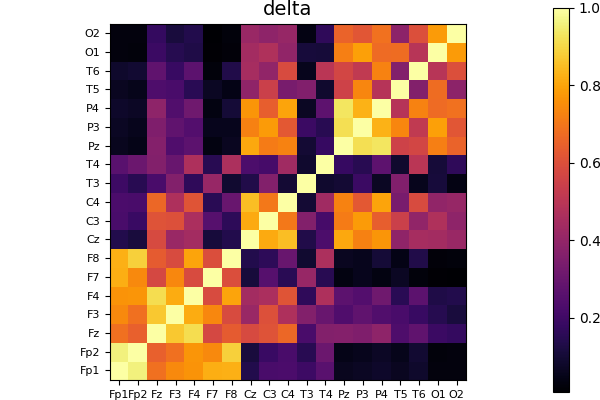

In [110]:
band = 1
bands = ["delta","theta","alpha1","alpha2","beta1","beta2","gamma"]
    coh_mat = reshape(coh_bands[:,band],19,19)
heatmap(header,header,coh_mat,aspect_ratio=1, title=bands[band])

# Output
Return correlation matirx, and coherence matrices
```
cor_mat
[coh_delta coh_theta coh_alpha1 coh_alpha2 coh_beta1 coh_beta2 coh_gamma]
```

In [24]:
[[coh_delta] [coh_theta] [coh_alpha1] [coh_alpha2] [coh_beta1] [coh_beta2] [coh_gamma]]

1×7 Array{Array{Float64,2},2}:
 [1.0 0.961155 … 0.0296537 0.0302384; 0.961155 1.0 … 0.0271177 0.0296415; … ; 0.0296537 0.0271177 … 1.0 0.780176; 0.0302384 0.0296415 … 0.780176 1.0]  …  [1.0 0.540217 … 0.126842 0.114058; 0.540217 1.0 … 0.128286 0.125162; … ; 0.126842 0.128286 … 1.0 0.660499; 0.114058 0.125162 … 0.660499 1.0]